## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
#Seu Código aqui....
df = pd.read_csv('aptos.csv')
df.head(15)



,metros,valor,quartos,vagas,reformado,bairro
0,107,560,3,2,0,Vila Lusitania
1,107,555,3,2,1,Vila Lusitania
2,49,196,2,1,0,Ferrazopolis
3,104,515,3,2,1,Centro
4,92,560,3,2,1,Vila Lusitania
5,51,249,2,1,0,Taboao
6,140,635,4,3,1,Centro
7,50,210,2,1,1,Demarchi
8,93,450,3,2,0,Baeta Neves
9,107,425,3,2,1,Rudge Ramos


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

- Metros: Metros quadrados do apartamento.

- Valor: Preço simplificado do apartamento (Ex: 500 = R$500.000,00)

- Quartos: Numero de quartos do apartamento

- Vagas: Vagas de garagem do apartamento

- Reformada: Se o apartamento foi reformado (1 - Sim, 0 - Não)

- Bairro: Bairro que se encontra o apartamento

**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

**Resposta:**

1.  O preço do apartamente sobe quando comparado com o tamanha do apartamento.
2.  O preço medio e do metro quadraro do apartamento muda de acordo com o bairro que esta localizado

## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

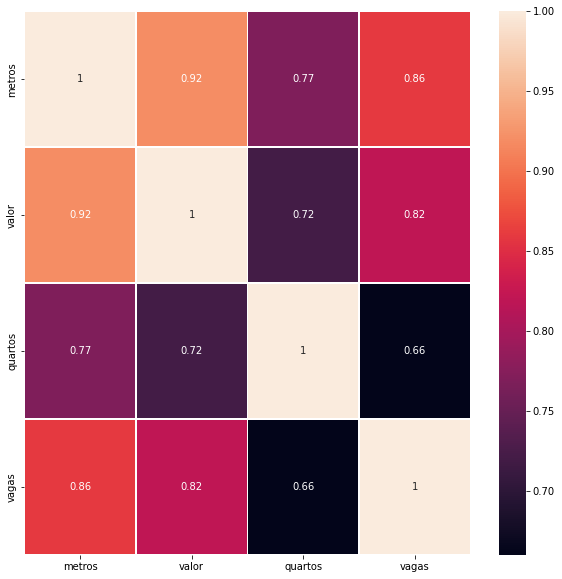

In [3]:
#Seu Código aqui...
dfcorr = df[['metros', 'valor', 'quartos', 'vagas' ]]

correlation_matrix = dfcorr.corr().round(2)

fig, ax = plt.subplots(figsize=(10,10))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

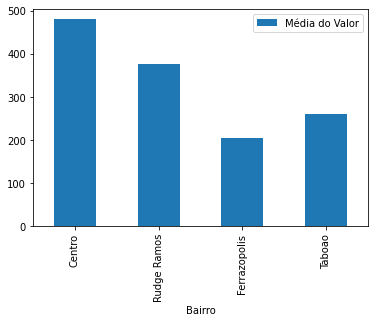

In [4]:
#Seu Código aqui...
centro = df['valor'][df['bairro'] == 'Centro'].mean()
rud = df['valor'][df['bairro'] == 'Rudge Ramos'].mean()
ferra = df['valor'][df['bairro'] == 'Ferrazopolis'].mean()
tab = df['valor'][df['bairro'] == 'Taboao'].mean()

data = {'Bairro': ['Centro', 'Rudge Ramos', 'Ferrazopolis', 'Taboao'], 'Média do Valor': [centro, rud, ferra, tab]}  
media = pd.DataFrame(data)

media.plot(x ='Bairro', y='Média do Valor', kind = 'bar')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


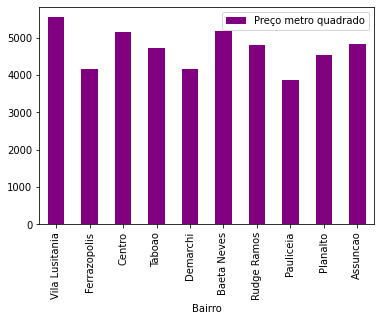

In [5]:
lista_nomes = []
lista_valores = []

for n in range(10):
  df = pd.read_csv("aptos.csv",",")
  x = df['bairro'].unique()
  selecao = (df.bairro == x[n])
  df3 = df[selecao]
  valor_metro_quadrado = df3['valor'].sum() / df3['metros'].sum()
  lista_valores.append(valor_metro_quadrado*1000)
  lista_nomes.append(df['bairro'].unique()[n])

data = {'Bairro': lista_nomes, 'Preço metro quadrado': lista_valores}  
media = pd.DataFrame(data)
media.plot(x ='Bairro', y='Preço metro quadrado', kind = 'bar', color = 'purple')

### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [x] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado
    
Pois, temos exemplos ja rotulados do valor de imóvel, oque pode ser usado para testar a acurácia do modelo.

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [x] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. algoritimo Regresão Linear
2. algoritimo Regresão Polinomial

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. A regressão linear é um método de regressão estatística simples e silencioso usado para análise preditiva e mostra a relação entre as variáveis ​​contínuas. A regressão linear mostra a relação entre uma variável independente e a variável dependente ex: x e y. Se houver uma única variável de entrada, essa regressão linear é chamada de regressão linear simples. E se houver mais de uma variável de entrada, essa regressão linear é chamada de regressão linear múltipla. O modelo de regressão linear fornece uma linha reta inclinada que descreve a relação entre as variáveis. Quando o valor de uma das variaveis aumenta a outra aumenta tambem;

2. A regressão polinomial é um algoritmo de regressão que modela a relação entre a variável dependente (y) e a variável independente (x) como um polinômio de grau n. É um modelo linear, com algumas modificações para melhorar a precisão, converter os recursos originais em recursos polinomiais do grau desejado (2,3,..,n), depois modelar usando o modelo linear;

## 4. Treinamento e teste do modelo



```
# Isto está formatado como código
```

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('aptos.csv')
X = df[['metros','quartos','vagas','reformado']]
Y = df[['valor']]

Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

### Algoritmo 1

In [27]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.2, random_state = 42)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()

lin_model.fit(X_treino, Y_treino)

y_teste_predito = lin_model.predict(X_teste)

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import numpy as np

print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_teste_predito - Y_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(Y_teste, y_teste_predito))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(Y_teste, y_teste_predito))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(Y_teste, y_teste_predito)))
print("R2-score: %.2f" % r2_score(y_teste_predito , Y_teste) )


Soma dos Erros ao Quadrado (SSE): 48363 
Erro Quadrático Médio (MSE): 8060.53
Erro Médio Absoluto (MAE): 81.10
Raiz do Erro Quadrático Médio (RMSE): 89.78 
R2-score: 0.84


### Algoritmo 2

Soma dos Erros ao Quadrado (SSE): 238 
Erro Quadrático Médio (MSE): 11.90
Erro Médio Absoluto (MAE): 2.66
Raiz do Erro Quadrático Médio (RMSE): 3.45 
R2-score: 0.98


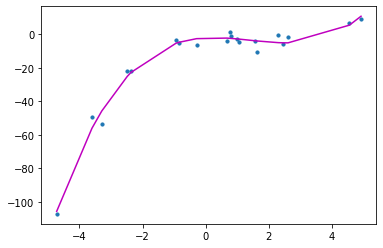

In [9]:
#Seu Código aqui...


import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# importa feature polinomial
from sklearn.preprocessing import PolynomialFeatures

#gera numeros aleatorios, apenas para exemplo
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# ajuste nos dados, pois estamos trabalhando com a numpy 
x = x[:, np.newaxis]
y = y[:, np.newaxis]

#----É aqui que o seu código muda

# Chama a função definindo o grau do polinomio e aplica o modelo
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

#----Pronto agora é tudo como era antes, com regressão linear


model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

# Métrica de avaliação do modelo
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_poly_pred - y)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y,y_poly_pred))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y, y_poly_pred))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(y, y_poly_pred)))
print("R2-score: %.2f" % r2_score(y,y_poly_pred) )


plt.scatter(x, y, s=10)
# ordena os valores de x antes de plotar
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

plt.plot(x, y_poly_pred, color='m')
plt.show()


Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

|    | algoritmo1 | algoritmo2 |
|:---:|:---:|:---:|
| treino | X | X |
| teste  | 0.84 | 0.98 |

**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

**Resposta:** O algoritmo polinomial, menos erros e score quase perfeito

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [10]:
#Seu Código aqui...

buscar_bairro = df['bairro'].unique()
bairro_especifico = (df.bairro == 'Centro')
dfbairro = df[bairro_especifico]
dfbairro

X = dfbairro[['metros','quartos','vagas','reformado']]
Y = dfbairro[['valor']]

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2)


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_treino, Y_treino)
features = np.array([[65,2,2,1]])
prediction = knn.predict(features)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [11]:
print("O preço de um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro vale :",prediction,"mil reais")

O preço de um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro vale : [330] mil reais


## 5. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: Digamos que no final conseguimos responder a pergunta, mas provavelmente não do modo certo

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: Teriamos que dar uma recaptulada nas ultimas aulas, a parte de analise de dados e fazer os graficos foi tranquila, mas ficamos muito confusos na hora de desenvolver os codigos de regressao e no final acabamos so dando crtlc crtlv




